In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
# USE GPU 0
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# load data
data_fname = '/scratch/jx8fh/2024-09-04-LGE1K-all-matched-slices-363.npy'
data = np.load(data_fname, allow_pickle=True).tolist()

In [4]:
check_dict(data[0])

cine                                                         dict_keys(['lv_endo', 'lv_epi', 'lv_papillary', 'mv_annulus', 'rv_endo', 'rv_epi', 'rv_papillary', 'tv_annulus', 'rv_insertion', 'anterior_rv_insertion', 'ra_endo', 'la_endo', 'raw_image', 'uid', 'trigger_time', 'pixel_size', 'orientation', 'slice_thickness', 'space_between_slice', 'image_position', 'patient_name', 'series_name', 'series_number', 'series_uid', 'series_type', 'zero_based', 'phase_number', 'slice_number', 'heart_rate', 'lv_es_phase', 'lv_ed_phase', 'study_date', 'lv_edv', 'lv_esv', 'rv_edv', 'rv_esv', 'la_edv', 'la_esv', 'ra_edv', 'ra_esv', 'cropping_box', 'fxn_sax_lv_peak_strain_circumferential', 'fxn_sax_lv_peak_systolic_strain_rate_radial', 'fxn_sax_lv_peak_systolic_strain_rate_circumferential', 'fxn_sax_lv_peak_strain_radial'])
LGE                                                          dict_keys(['info_contrast_0', 'image_contrast_0', 'info_contrast_1', 'image_contrast_1', 'info_contrast_2', 'image_contra

In [5]:
check_dict(data[0]['cine'])

lv_endo                                                      (32,)               
lv_epi                                                       (32,)               
lv_papillary                                                 (32,)               
mv_annulus                                                   (32,)               
rv_endo                                                      (32,)               
rv_epi                                                       (32,)               
rv_papillary                                                 (32,)               
tv_annulus                                                   (32,)               
rv_insertion                                                 (32,)               
anterior_rv_insertion                                        (32,)               
ra_endo                                                      (32,)               
la_endo                                                      (32,)               
raw_image       

In [6]:
check_dict(data[0]['cine'])

lv_endo                                                      (32,)               
lv_epi                                                       (32,)               
lv_papillary                                                 (32,)               
mv_annulus                                                   (32,)               
rv_endo                                                      (32,)               
rv_epi                                                       (32,)               
rv_papillary                                                 (32,)               
tv_annulus                                                   (32,)               
rv_insertion                                                 (32,)               
anterior_rv_insertion                                        (32,)               
ra_endo                                                      (32,)               
la_endo                                                      (32,)               
raw_image       

In [7]:
data[1]['cine']['pixel_size']

array([array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=float32),
       array([1.4166666, 1.4166666], dtype=flo

In [8]:
sum([len(datum['cine']['cropping_box']) > 0 for datum in data])

363

In [9]:
len(data)

363

In [10]:
data[1]['cine']['cropping_box']

array([ 94.07470398, 143.52541656,  64.36298828, 112.56891937])

In [11]:
# visualize cine image, LGE image and LGE scar mask
import matplotlib.pyplot as plt
from modules.data.processing.contour_utils import generate_binary_mask_from_two_contours_seq
vis_slice_idx = 20
vis_cine_frame = 0
vis_slice = data[vis_slice_idx]
vis_cine_video = vis_slice['cine']['raw_image']

In [12]:
vis_cine_video_np = np.concatenate([f[...,None] for f in vis_cine_video], axis=-1)

In [13]:
from modules.data.processing.contour_utils import generate_binary_masks_from_contour_seq
vis_cine_lv_endo_contours = [c.contour for c in vis_slice['cine']['lv_endo']]
vis_cine_lv_epi_contours = [c.contour for c in vis_slice['cine']['lv_epi']]
# vis_cine_lv_epi_contours = vis_slice['cine']['lv_epi'][vis_cine_frame].contour

image_shape = vis_cine_video[0].shape
implementation='skimg'
centering=False 
# contour_ori_center=None
contour_ori_center = vis_cine_lv_epi_contours[0].mean(axis=0)
mask0 = generate_binary_masks_from_contour_seq(vis_cine_lv_epi_contours, image_shape, implementation, centering=centering, contour_ori_center=contour_ori_center)
mask1 = generate_binary_masks_from_contour_seq(vis_cine_lv_endo_contours, image_shape, implementation, centering=centering, contour_ori_center=contour_ori_center)
mask = np.logical_xor(mask0, mask1)

In [14]:
from modules.data.processing.mask_utils import crop_image_given_bbox
H_cropped = W_cropped = 96
lv_endo_center = vis_cine_lv_endo_contours[0].mean(axis=0)
slice_myo_bbox = [int(lv_endo_center[1])-H_cropped//2,int(lv_endo_center[1])-H_cropped//2+H_cropped, int(lv_endo_center[0])-W_cropped//2,int(lv_endo_center[0])-W_cropped//2+W_cropped]
print(slice_myo_bbox)

cropped_mask = crop_image_given_bbox(mask, slice_myo_bbox)
cropped_video = crop_image_given_bbox(vis_cine_video_np, slice_myo_bbox)

[50, 146, 64, 160]


In [15]:
vis_slice['cine']['cropping_box']

array([ 82.96199951, 143.14900055,  70.16912689, 129.38662109])

In [16]:
slice_myo_bbox

[50, 146, 64, 160]

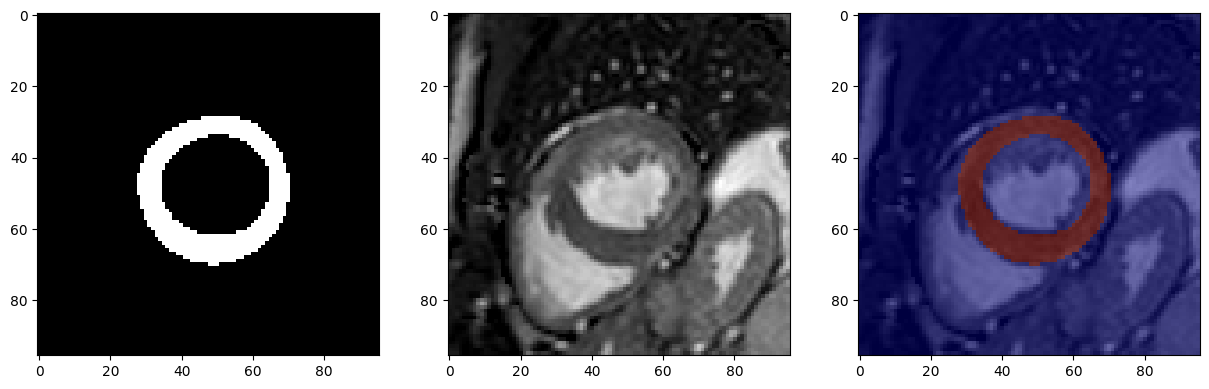

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
vis_frame_idx = 15
axs[0].imshow(cropped_mask[...,vis_frame_idx], cmap='gray')
axs[1].imshow(cropped_video[...,vis_frame_idx], cmap='gray')
axs[2].imshow(cropped_video[...,vis_frame_idx], cmap='gray')
axs[2].imshow(cropped_mask[...,vis_frame_idx], cmap='jet', alpha=0.5)

In [18]:
def get_vol_mask_non_zero_width_height(vol_mask, margin=0):
    """
    Get the width and height of the non-zero region of the input binary volume mask.
    Parameters:
    - vol_mask (numpy.ndarray): Input binary volume mask with shape (height, width, depth).

    Returns:
    - tuple: A tuple containing the width and height of the non-zero region.
    """
    # Find the indices of non-zero elements in the volume mask
    non_zero_indices = np.nonzero(vol_mask)
    # Get the width and height of the non-zero region
    width = max(non_zero_indices[0]) - min(non_zero_indices[0]) + 1 + margin*2
    height = max(non_zero_indices[1]) - min(non_zero_indices[1]) + 1 + margin*2
    return width, height
# get_vol_mask_non_zero_width_height(mask)

In [19]:
# crop all slices and save the cropped into a new list
import tqdm
H_cropped = W_cropped = 128
implementation='skimg'
centering=False 
cropped_cine_slices = []
n_no_contour_case = 0
for datum_idx, datum in tqdm.tqdm(enumerate(data)):
    curr_cine_video = datum['cine']['raw_image']
    curr_cine_video_np = np.concatenate([f[...,None] for f in curr_cine_video], axis=-1)

    try:
        curr_cine_lv_endo_contours = [c.contour for c in datum['cine']['lv_endo']]
        curr_cine_lv_epi_contours = [c.contour for c in datum['cine']['lv_epi']]
    except:
        n_no_contour_case += 1
        cropped_cine_slices.append(None)
        continue
    # vis_cine_lv_epi_contours = vis_slice['cine']['lv_epi'][vis_cine_frame].contour

    image_shape = curr_cine_video[0].shape
    
    # contour_ori_center=None
    contour_ori_center = curr_cine_lv_epi_contours[0].mean(axis=0)
    mask0 = generate_binary_masks_from_contour_seq(curr_cine_lv_epi_contours, image_shape, implementation, centering=centering, contour_ori_center=contour_ori_center)
    mask1 = generate_binary_masks_from_contour_seq(curr_cine_lv_endo_contours, image_shape, implementation, centering=centering, contour_ori_center=contour_ori_center)
    mask = np.logical_xor(mask0, mask1)

    # get the height and width of the mask non-zero region
    # mask_width, mask_height = get_vol_mask_non_zero_width_height(mask, margin = 2)
    # H_cropped = mask_height
    # W_cropped = mask_width
    # print(np.sum(mask, axis=(0,1)))
    # print(np.sum(mask, axis=(0,1))/np.sum(mask))
    
    lv_endo_center = curr_cine_lv_endo_contours[0].mean(axis=0)
    slice_myo_bbox = [int(lv_endo_center[1])-H_cropped//2,int(lv_endo_center[1])-H_cropped//2+H_cropped, int(lv_endo_center[0])-W_cropped//2,int(lv_endo_center[0])-W_cropped//2+W_cropped]
    # print(slice_myo_bbox)

    cropped_mask = crop_image_given_bbox(mask, slice_myo_bbox)
    cropped_video = crop_image_given_bbox(curr_cine_video_np, slice_myo_bbox)

    cropped_cine_slices.append({
        'mag': cropped_video,
        'mask': cropped_mask
    })

363it [00:40,  8.99it/s]


In [20]:
mask.shape

(288, 288, 32)

In [21]:
# def get_vol_mask_non_zero_width_height(vol_mask):
#     """
#     Get the width and height of the non-zero region of the input binary volume mask.
#     Parameters:
#     - vol_mask (numpy.ndarray): Input binary volume mask with shape (height, width, depth).

#     Returns:
#     - tuple: A tuple containing the width and height of the non-zero region.
#     """
#     # Find the indices of non-zero elements in the volume mask
#     non_zero_indices = np.nonzero(vol_mask)
#     # Get the width and height of the non-zero region
#     width = max(non_zero_indices[0]) - min(non_zero_indices[0]) + 1
#     height = max(non_zero_indices[1]) - min(non_zero_indices[1]) + 1
#     return width, height
# get_vol_mask_non_zero_width_height(mask)

In [22]:
n_no_contour_case

118

In [23]:
datum_idx

362

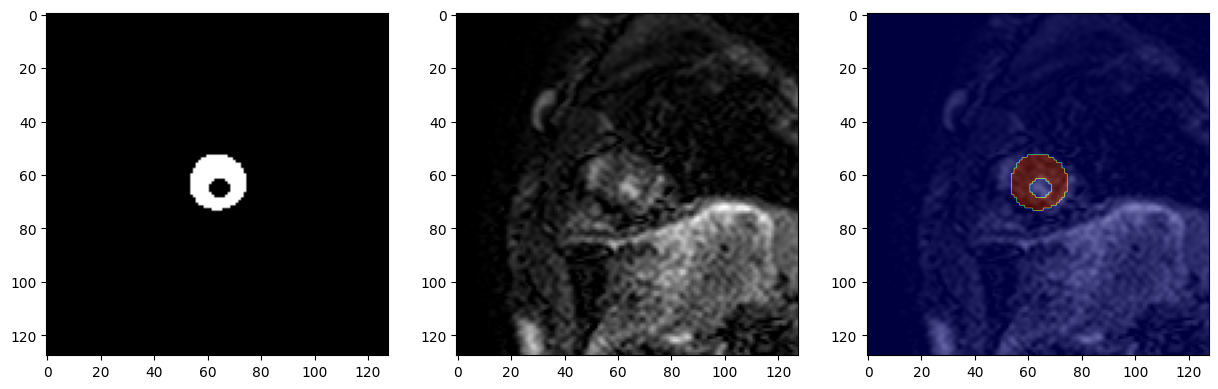

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
vis_slice_idx = 220
vis_frame_idx = 15
axs[0].imshow(cropped_cine_slices[vis_slice_idx]['mask'][...,vis_frame_idx], cmap='gray')
axs[1].imshow(cropped_cine_slices[vis_slice_idx]['mag'][...,vis_frame_idx], cmap='gray')
axs[2].imshow(cropped_cine_slices[vis_slice_idx]['mag'][...,vis_frame_idx], cmap='gray')
axs[2].imshow(cropped_cine_slices[vis_slice_idx]['mask'][...,vis_frame_idx], cmap='jet', alpha=0.5)

In [25]:
np.where(np.array([d['mag'].shape[0] if d is not None else 0 for d in cropped_cine_slices])==30)

(array([], dtype=int64),)

In [26]:
cropped_cine_slices[40]['mask'].shape

(128, 128, 32)

In [27]:
cropped_cine_slices[28]

In [28]:
np.array(sorted(np.unique([d['mag'].shape[0] for d in cropped_cine_slices if d is not None])))

array([128])

In [29]:
np.array(sorted(np.unique([d['mag'].shape[1] for d in cropped_cine_slices if d is not None])))

array([128])

In [30]:
cropped_cine_slices[1]['mag'].shape

(128, 128, 32)

In [31]:
# pad all slices to a shared minimal 

In [33]:
# save to npy file
save_fname = Path('/scratch/jx8fh/2024-11-10-cine-to-extract-motion-128.npy')
np.save(save_fname, np.array(cropped_cine_slices))